# **Kelas : Belajar Machine Learning untuk Pemula**
# *Proyek Akhir : Klasifikasi Gambar*

Nama : Muhammad Haikal Nasution

Username : mhnst05

email : muhammadhaikalnasution@gmail.com

# **1. Import Library dan mengunduh dataset dari server**

In [ ]:
import zipfile, os, shutil
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-01 02:46:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.28MB/s    in 94s     

2021-07-01 02:48:29 (3.28 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# **2. Extract dataset dan membuat direktori untuk train dan validation**

In [ ]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# path direktori dataset
main_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(main_dir, 'train')
val_dir = os.path.join(main_dir, 'val')

r_dir = os.path.join(main_dir, 'rock')
p_dir = os.path.join(main_dir, 'paper')
s_dir = os.path.join(main_dir, 'scissors')

In [ ]:
if os.path.exists(train_dir):
  shutil.rmtree(train_dir)

if os.path.exists(val_dir):
  shutil.rmtree(val_dir)

os.mkdir(train_dir)
os.mkdir(val_dir)

In [ ]:
# membuat direktori rock pada direktori data_train
train_r = os.path.join(train_dir, 'rock')
# membuat direktori paper pada direktori data_train
train_p = os.path.join(train_dir, 'paper')
# membuat direktori scissors pada direktori data_train
train_s = os.path.join(train_dir, 'scissors')
# membuat direktori rock pada direktori data_validation
val_r = os.path.join(val_dir, 'rock')
# membuat direktori paper pada direktori data_validation
val_p = os.path.join(val_dir, 'paper')
# membuat direktori scissors pada direktori data_validation
val_s = os.path.join(val_dir, 'scissors')

In [ ]:
# Membuat direktori train dan validation untuk masing-masing rock, paper, dan scissors
os.mkdir(train_r)
os.mkdir(train_p)
os.mkdir(train_s)
os.mkdir(val_r)
os.mkdir(val_p)
os.mkdir(val_s)

# **3. membagi dataset menjadi train set dan validation set dengan ukuran validation set 40%**

In [ ]:
# Membagi setiap direktori untuk data_train dan data_validation (validasi 40% dari dataset)
train_r_dir, val_r_dir = train_test_split(os.listdir(r_dir), test_size = 0.40)
train_p_dir, val_p_dir = train_test_split(os.listdir(p_dir), test_size = 0.40)
train_s_dir, val_s_dir = train_test_split(os.listdir(s_dir), test_size = 0.40)

# salin file dari direktori rock, paper, scissors menuju direktori train dan validation dari rock, paper, scissors
for file in train_r_dir:
  shutil.copy(os.path.join(r_dir, file), os.path.join(train_r, file))
for file in train_p_dir:
  shutil.copy(os.path.join(p_dir,file), os.path.join(train_p,file))
for file in train_s_dir:
  shutil.copy(os.path.join(s_dir,file), os.path.join(train_s,file))
for file in val_r_dir:
  shutil.copy(os.path.join(r_dir, file), os.path.join(val_r,file))
for file in val_p_dir:
  shutil.copy(os.path.join(p_dir,file), os.path.join(val_p,file))
for file in val_s_dir:
  shutil.copy(os.path.join(s_dir,file), os.path.join(val_s,file))

# **4. Membuat ImageDataGenerator dan Augmentasi Gambar**

In [ ]:
# membuat sebuah objek ImageDataGenerator untuk data training dan data testing
train_datagen = ImageDataGenerator(
    rescale=1./255,      
    rotation_range=40,  
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    fill_mode='nearest',
    validation_split = 0.4
)
test_datagen = ImageDataGenerator(
    rescale=1./255,   
    rotation_range=40,     
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    fill_mode='nearest',
    validation_split = 0.4
)

In [ ]:
# mempersiapkan data training yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=False
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# **5. Membangun model arsitektur dan melakukan training model**

In [ ]:
# Model Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),     # layer konvolusi pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),    # layer konvolusi kedua
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),    # layer konvolusi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),    # layer konvolusi keempat
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # menggunakan 'softmax' untuk dataset yang memiliki 3 kelas
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# Model Optimizer dan Loss Function
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# membangun fungsi Callback untuk menghentikan training model ketika accuracy sudah diatas 96%
class stop_epoch(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("--> Callback: akurasi di atas 96%, syarat sudah terpenuhi <--")
      self.model.stop_training = True

callbacks = stop_epoch()

In [ ]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch = 41,
      epochs = 20,
      validation_data = validation_generator,
      validation_steps = 27,
      verbose=2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 116s - loss: 1.0783 - accuracy: 0.4062 - val_loss: 1.0322 - val_accuracy: 0.3657
Epoch 2/20
41/41 - 113s - loss: 0.7054 - accuracy: 0.7073 - val_loss: 0.4779 - val_accuracy: 0.8160
Epoch 3/20
41/41 - 112s - loss: 0.4488 - accuracy: 0.8293 - val_loss: 0.3132 - val_accuracy: 0.8796
Epoch 4/20
41/41 - 111s - loss: 0.3541 - accuracy: 0.8765 - val_loss: 0.4354 - val_accuracy: 0.8530
Epoch 5/20
41/41 - 111s - loss: 0.3200 - accuracy: 0.8880 - val_loss: 0.2865 - val_accuracy: 0.8924
Epoch 6/20
41/41 - 110s - loss: 0.3279 - accuracy: 0.8880 - val_loss: 0.2691 - val_accuracy: 0.8900
Epoch 7/20
41/41 - 110s - loss: 0.2335 - accuracy: 0.9169 - val_loss: 0.2053 - val_accuracy: 0.9259
Epoch 8/20
41/41 - 111s - loss: 0.1826 - accuracy: 0.9428 - val_loss: 0.1810 - val_accuracy: 0.9375
Epoch 9/20
41/41 - 111s - loss: 0.1636 - accuracy: 0.9535 - val_loss: 0.1150 - val_accuracy: 0.9549
Epoch 10/20
41/41 - 111s - loss: 0.1514 - accuracy: 0.9566 - val_loss: 0.1241 - val_accuracy: 0.9583

# **6. Memprediksi dari gambar yang di upload**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
def predict():
  uploaded = files.upload()
  for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    
    print(fn)
    if classes[0,0]!=0:
      print('Kertas')
    elif classes[0,1]!=0:
      print('Batu')
    else:
      print('Gunting')

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K (1).png
0a3UtNzl5Ll3sq8K.png
Kertas


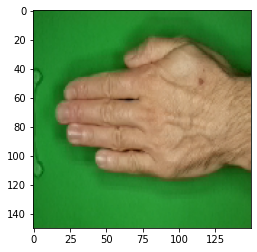

In [ ]:
predict()

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (1).png
00nKV8oHuTGi20gq.png
Batu


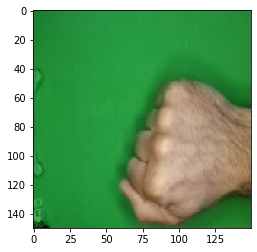

In [ ]:
predict()

In [ ]:
predict()

NameError: ignored